In [58]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,r2_score,mean_squared_error

plt.rcParams['figure.figsize']=(10,10)
plt.rcParams['figure.dpi']=100

In [2]:
# loading the data

In [3]:
df=pd.read_csv(r"D:\DS PYTHON\Assignment\Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### converting the categorical column into numerical using get dummies

In [4]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,3,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,3,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,Yes
396,6.14,139,23,3,37,120,2,55,11,No,Yes
397,7.41,162,26,12,368,159,2,40,18,Yes,Yes
398,5.94,100,79,7,284,95,3,50,12,Yes,Yes


In [5]:
# converting the sales column into categorical column

In [6]:
def filter(x):
    if x<= np.mean(df.Sales):
        return 'Low Sale'
    else: 
        return 'High Sale'

In [7]:
df['sales_cat'] = df['Sales'].copy()
df['sales_cat'] = df['sales_cat'].apply(filter)
df.pop('Sales')
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,3,42,17,Yes,Yes,High Sale
1,111,48,16,260,83,1,65,10,Yes,Yes,High Sale
2,113,35,10,269,80,2,59,12,Yes,Yes,High Sale
3,117,100,4,466,97,2,55,14,Yes,Yes,Low Sale
4,141,64,3,340,128,3,38,13,Yes,No,Low Sale


In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 
df['Urban']= label_encoder.fit_transform(df['Urban']) 
df['US']= label_encoder.fit_transform(df['US']) 
df['sales_cat']=df['sales_cat'].map({'Low Sale':0,'High Sale':1})

df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,2,42,17,1,1,1
1,111,48,16,260,83,0,65,10,1,1,1
2,113,35,10,269,80,1,59,12,1,1,1
3,117,100,4,466,97,1,55,14,1,1,0
4,141,64,3,340,128,2,38,13,1,0,0


#### EDA

In [9]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,1.027500,53.322500,13.900000,0.705000,0.645000,0.49750
std,15.334512,27.986037,6.650364,147.376436,23.676664,0.672961,16.200297,2.620528,0.456614,0.479113,0.50062
min,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000,0.00000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000,0.00000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,1.000000,54.500000,14.000000,1.000000,1.000000,0.00000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,1.000000,66.000000,16.000000,1.000000,1.000000,1.00000
max,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000,1.00000


In [10]:
df.isna().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales_cat      0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [29]:
data=df.iloc[:,:-1]

<AxesSubplot:>

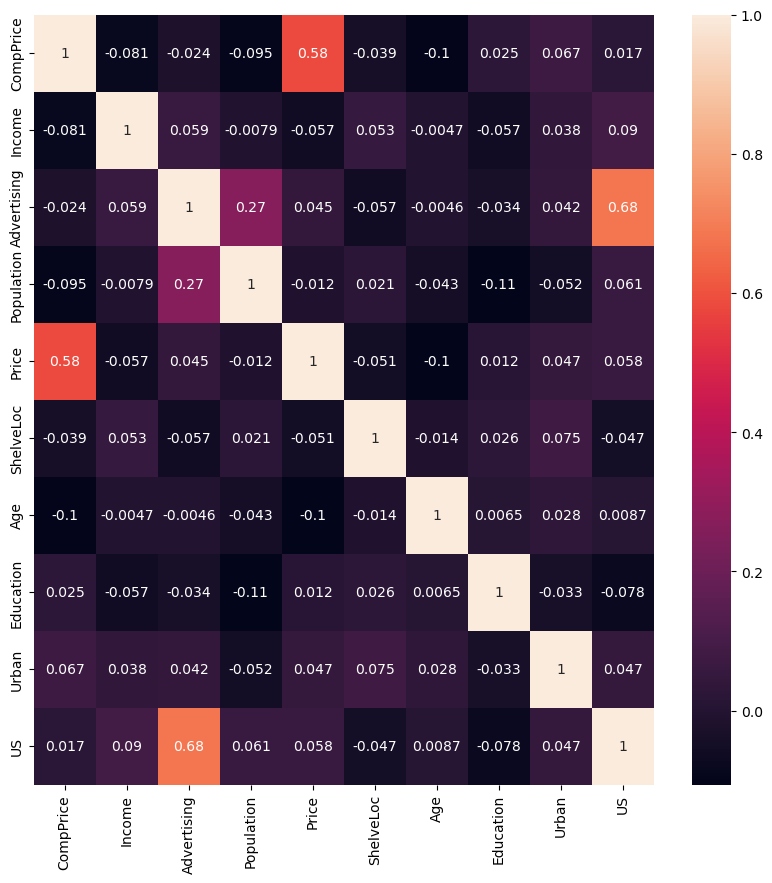

In [30]:
sb.heatmap(data.corr(),annot=True)

C:\Users\psaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales_cat', ylabel='count'>

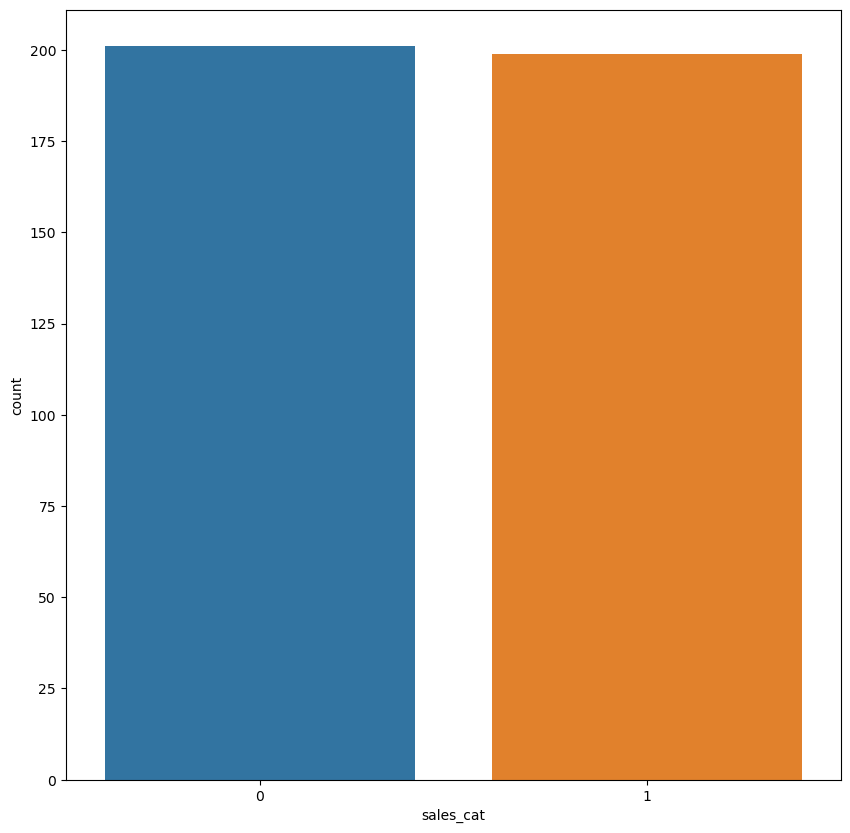

In [31]:
sb.countplot(df['sales_cat'])

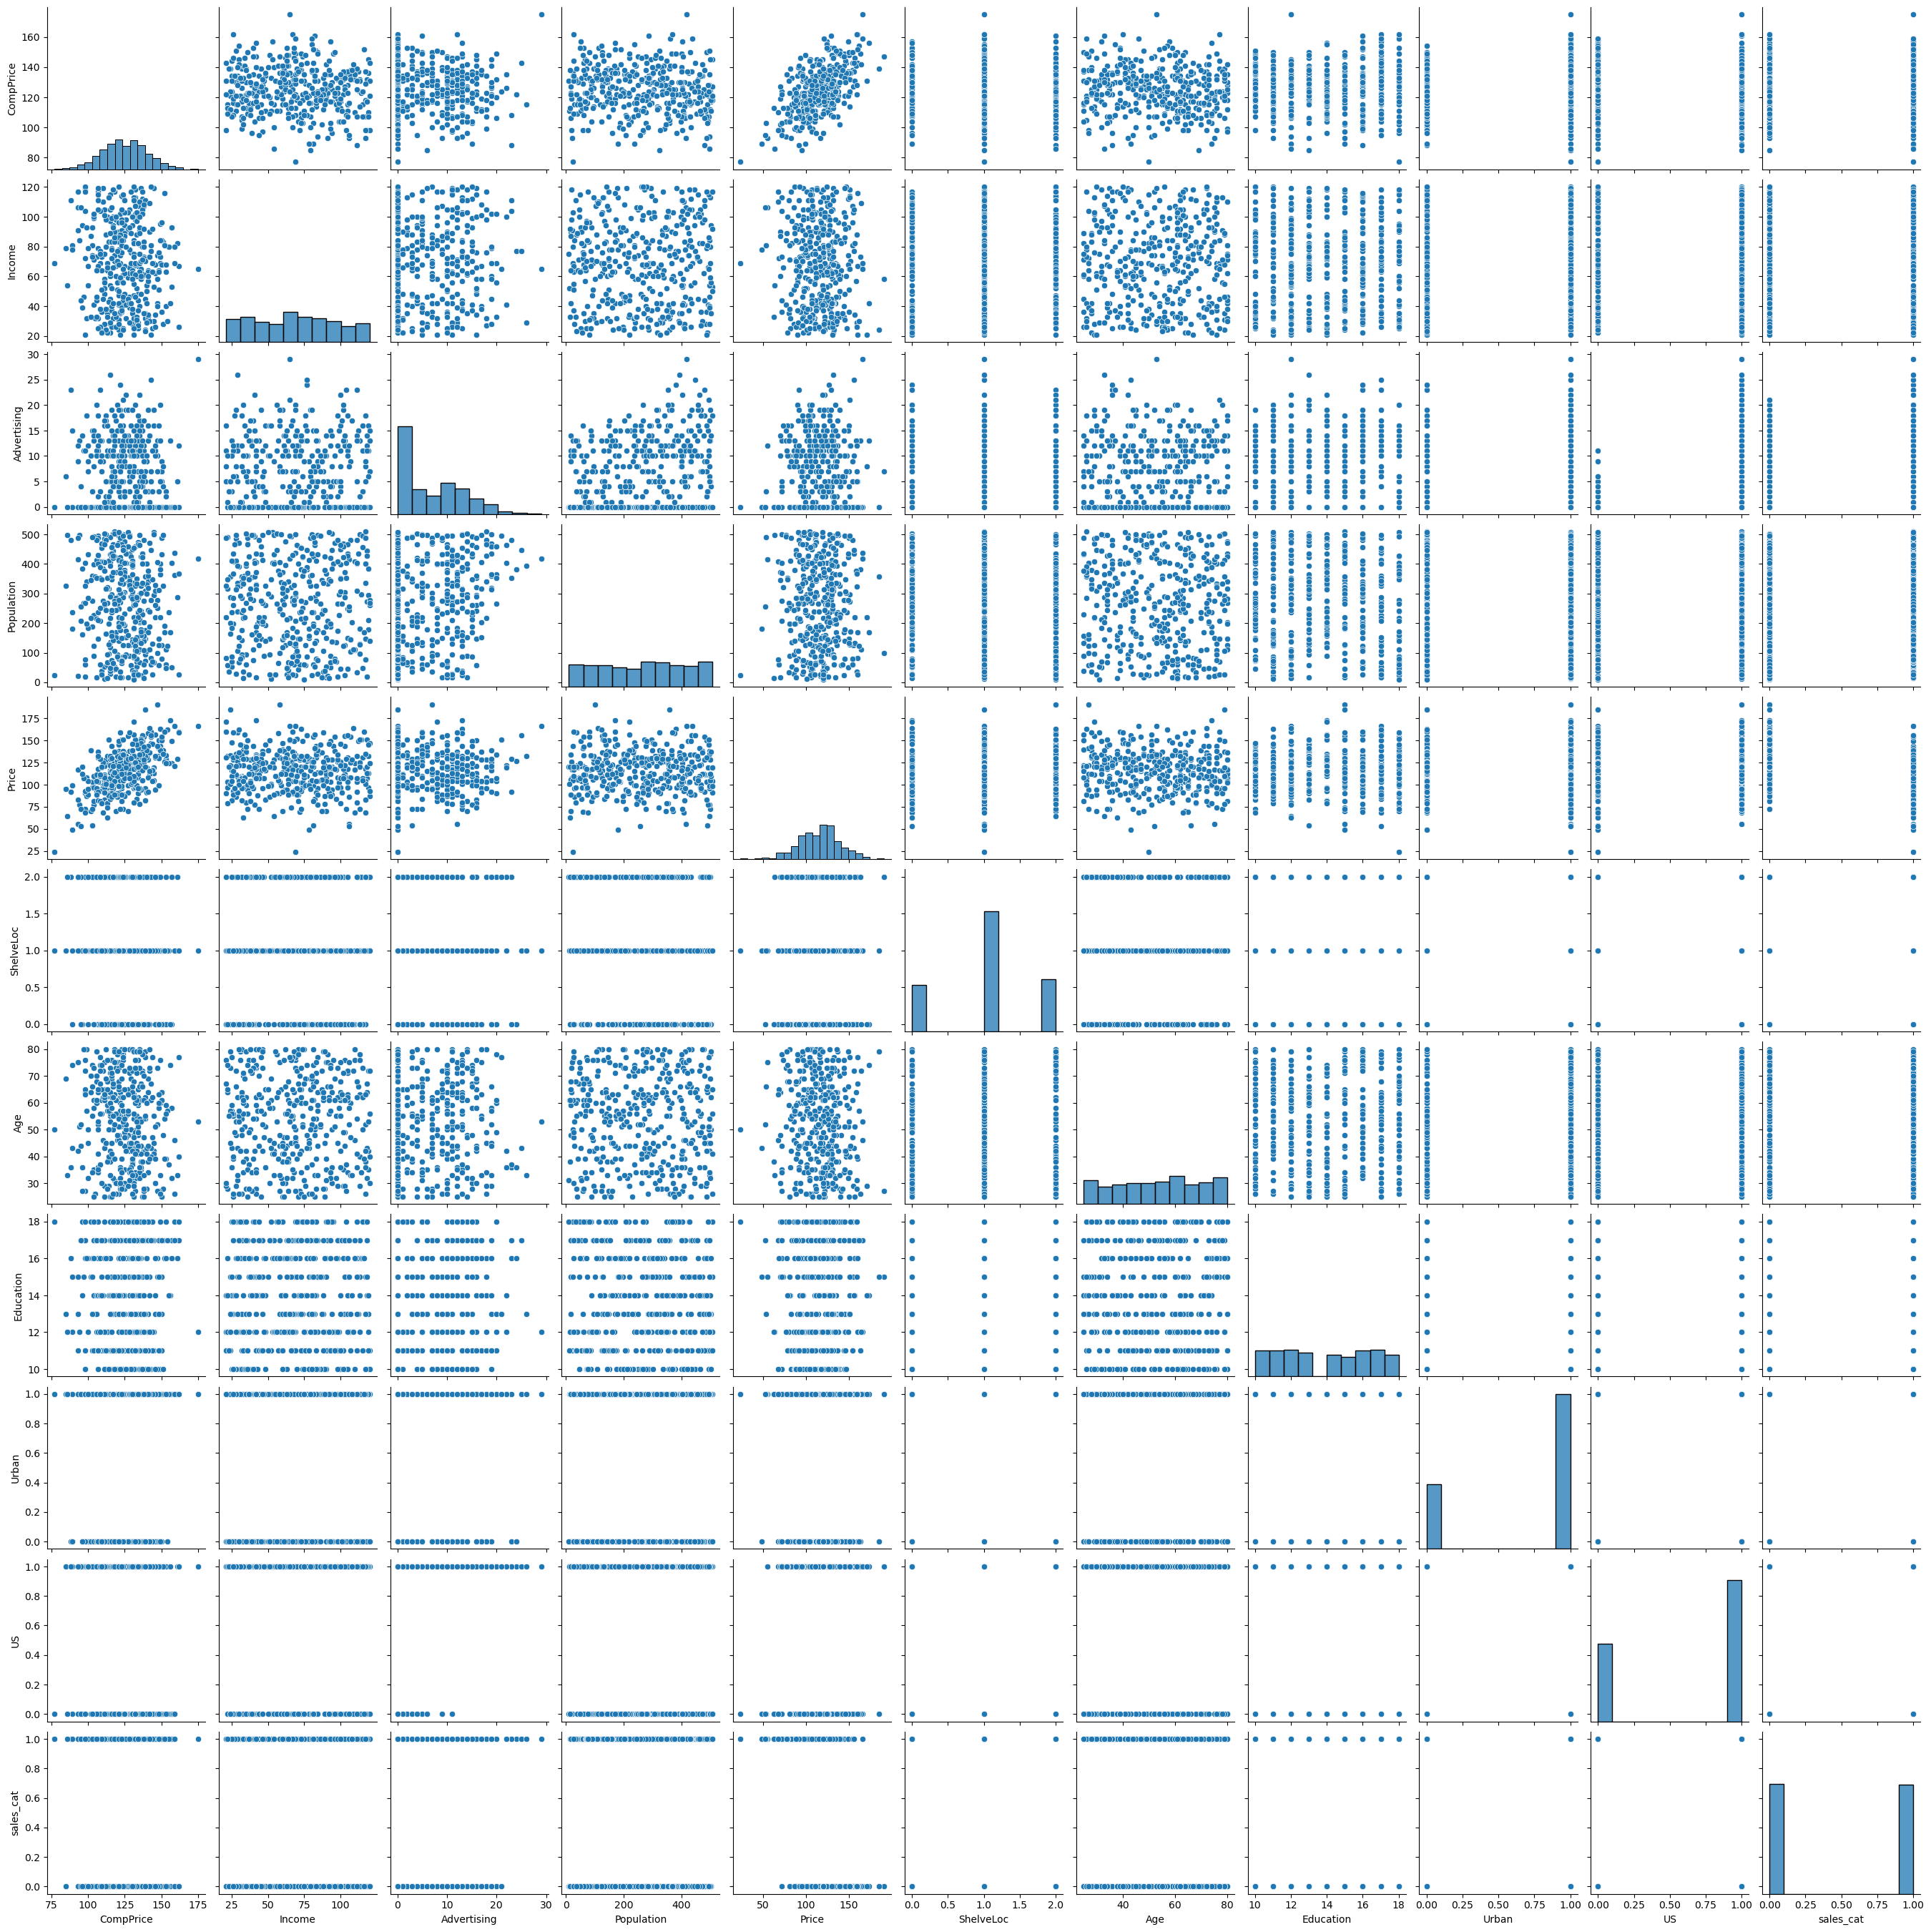

In [13]:
sb.pairplot(df)

#### Splitting The data into training and testing part

In [46]:
x=df.iloc[:,:-1]
y=df['sales_cat']

In [47]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,2,42,17,1,1
1,111,48,16,260,83,0,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,2,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,0,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,2,50,12,1,1


In [48]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: sales_cat, Length: 400, dtype: int64

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

#### Evaluating Classifier

In [56]:
model= RandomForestClassifier(n_estimators=10,max_depth=15,max_features='auto')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [57]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        51
           1       0.88      0.71      0.79        49

    accuracy                           0.81       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.81      0.81       100



In [52]:
#create function for combine multiple models

In [61]:
def predict(model):
    model=model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    print(classification_report(ytest,ypred))
    print('Training Accuracy', model.score(xtrain,ytrain))
    print('Testing Accuracy',model.score(xtest,ytest))

In [62]:
predict(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        51
           1       0.71      0.71      0.71        49

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100

Training Accuracy 1.0
Testing Accuracy 0.72


In [63]:
predict(GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        51
           1       0.80      0.80      0.80        49

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100

Training Accuracy 0.9933333333333333
Testing Accuracy 0.8


In [64]:
predict(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        51
           1       0.85      0.84      0.85        49

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100

Training Accuracy 0.9466666666666667
Testing Accuracy 0.85


#### Visualize the Random Forest

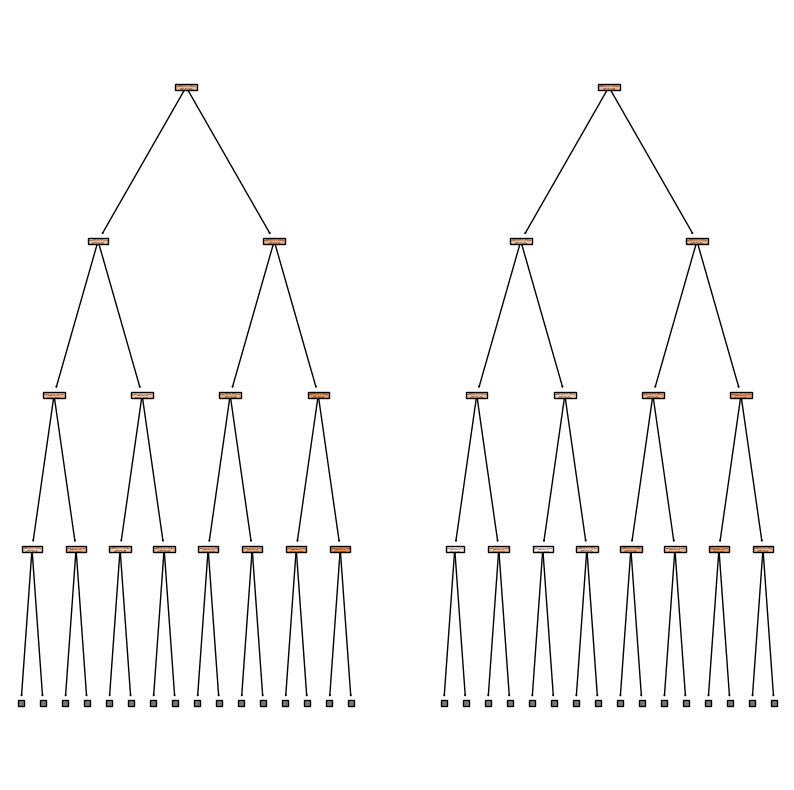

In [73]:
fig,ax=plt.subplots(1,2)
for i in range(0,2):
    tree.plot_tree(rf.estimators_[i],
    feature_names=x.columns,
    class_names=df['sales_cat'].unique(),
                  filled=True,max_depth=3,ax=ax[i])